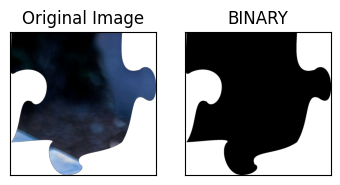

In [8]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img_path = 'puzzle/1/raster/8.png'
img = cv.imread(img_path, cv.IMREAD_UNCHANGED)
assert img is not None, "file could not be read, check with os.path.exists()"
ret,thresh1 = cv.threshold(img,254,255,cv.THRESH_BINARY)

titles = ['Original Image','BINARY']
images = [img, thresh1]
for i in range(2):
 plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
 plt.title(titles[i])
 plt.xticks([]),plt.yticks([])
plt.show()

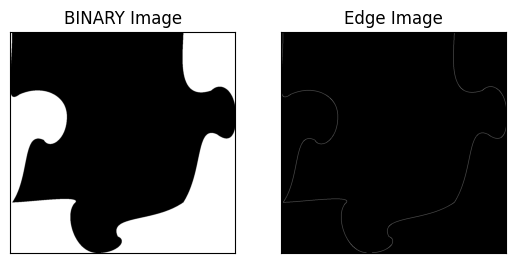

In [2]:

img = thresh1
assert img is not None, "file could not be read, check with os.path.exists()"
edges = cv.Canny(img,100,200)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('BINARY Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

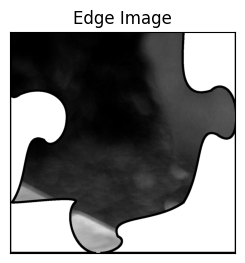

In [87]:

def png2white(png_image):
    # https://stackoverflow.com/questions/53732747/set-white-background-for-a-png-instead-of-transparency-with-opencv

    #make mask of where the transparent bits are
    trans_mask = png_image[:,:,3] == 0
    #replace areas of transparency with white and not transparent
    png_image[trans_mask] = [255, 255, 255, 255]
    #new image without alpha channel...
    new_img = cv.cvtColor(png_image, cv.COLOR_RGB2GRAY)
    return new_img

path = 'puzzle/1/raster/8.png'
img = cv.imread(path, cv.IMREAD_UNCHANGED)

_, binary_image = cv.threshold(img, 254, 255, cv.THRESH_BINARY)
new_binary_image = png2white(binary_image)

contours, _ = cv.findContours(new_binary_image, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
new_image = png2white(img)
canvas = np.zeros_like(new_image)
cv.drawContours(new_image, contours, -1, (0, 0, 0), 10)

plt.subplot(122),plt.imshow(new_image, cmap='gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()


In [189]:
# https://stackoverflow.com/questions/44650888/resize-an-image-without-distortion-opencv
def image_resize(image, width=None, height=None, inter=cv.INTER_AREA):
    # initialize the dimensions of the image to be resized and
    # grab the image size
    dim = None
    (h, w) = image.shape[:2]

    # if both the width and height are None, then return the
    # original image
    if width is None and height is None:
        return image

    # check to see if the width is None
    if width is None:
        # calculate the ratio of the height and construct the
        # dimensions
        r = height / float(h)
        dim = (int(w * r), height)

    # otherwise, the height is None
    else:
        # calculate the ratio of the width and construct the
        # dimensions
        r = width / float(w)
        dim = (width, int(h * r))

    # resize the image
    resized = cv.resize(image, dim, interpolation=inter)

    # return the resized image
    return resized

def resized_img(_img):
    _resized_img = image_resize(_img, width=115)
    _image_height = _resized_img.shape[0]
    _image_width = _resized_img.shape[1]

    top_padding = int((128 - _image_height) / 2)
    bottom_padding = (128 - _image_height) - top_padding

    left_padding = int((128 - _image_width) / 2)
    right_padding = (128 - _image_width) - left_padding

    bordered_image = cv.copyMakeBorder(_resized_img.copy(), 
                                top_padding, right_padding,
                                bottom_padding, left_padding, 
                                cv.BORDER_CONSTANT, value=[255, 255, 255])
    return bordered_image



In [188]:
img_path = 'puzzle/1/raster/8.png'
img = cv.imread(img_path, cv.IMREAD_UNCHANGED)


grayscale_image = png2white(thresh)
ret, thresh2 = cv.threshold(grayscale_image, 254, 255, cv.THRESH_BINARY)

contours, _ = cv.findContours(thresh2, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
contoured_image = png2white(bordered_image)
contour_canvas = np.zeros_like(contoured_image)
cv.drawContours(contoured_image, contours, -1, (255, 255, 255), 10)
cv.drawContours(contour_canvas, contours, -1, (255, 255, 255), 10)


titles = ['bordered_image','thresh','grayscale_image' , 'contoured_image', 'canvas']
images = [bordered_image, thresh, grayscale_image, contoured_image, contour_canvas ]
for i in range(len(images)):
 plt.subplot(2,3,i+1),plt.imshow(images[i],vmin=0,vmax=255)
 plt.title(titles[i])
 plt.xticks([]),plt.yticks([])
plt.show()

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

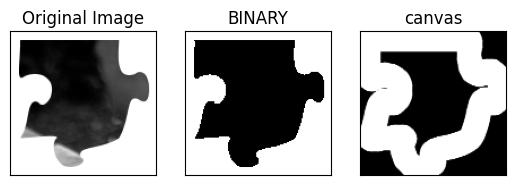

In [217]:
path = 'puzzle/1/raster/8.png'

img = cv.imread(path, cv.IMREAD_UNCHANGED)

white_background = png2white(img)
resized_image = resized_img(white_background)
_, binary_image = cv.threshold(resized_image, 254, 255, cv.THRESH_BINARY)


def turnWhitetoYellow(_img):
    _img[_img == 255] = 0
    _img[_img == 0] = 255
    return _img


contours, _ = cv.findContours(binary_image, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
canvas = np.zeros_like(resized_image)

white_background = turnWhitetoYellow(white_background)

cv.drawContours(canvas, contours, 1, (255, 255, 255), 20, lineType=cv.LINE_AA)

titles = ['Original Image','BINARY', 'canvas']
images = [resized_image, binary_image, canvas]
for i in range(3):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()


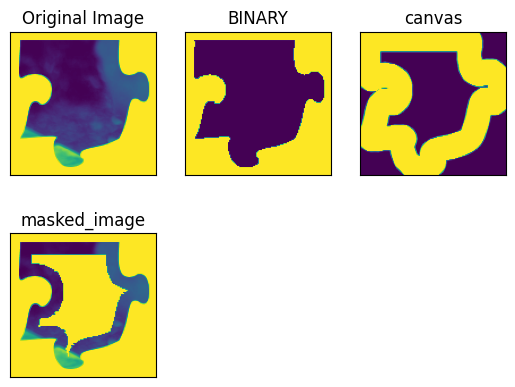

In [218]:
## use canvas to mask the original image

def mask_image(_img, _mask):
    mm = np.zeros_like(_img)
    for i in range(_img.shape[0]):
        for j in range(_img.shape[1]):
            if _mask[i][j] != 0:
                mm[i][j] = _img[i][j]
            else:
                mm[i][j] = 255
            
            
    return mm

masked_image = mask_image(resized_image, canvas)

titles = ['Original Image','BINARY', 'canvas', 'masked_image']
images = [resized_image, binary_image, canvas, masked_image]
for i in range(4):
    plt.subplot(2,3,i+1),plt.imshow(images[i],vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In [8]:
import os
import shutil
import json

mask_map = {}

with open("puzzle/1/size-100/piece_id_to_mask.json", "r") as f:
    mask_map = json.load(f)

## reverse key and value
mask_map = {f"{v}.bmp": f"{k}.bmp" for k, v in mask_map.items()}
path = "puzzle/1/size-100/mask/"

os.makedirs("puzzle/1/mask/", exist_ok=True)
for i in os.listdir(path):
    if i.endswith("padding.bmp"):
        continue
    shutil.copyfile(path + i, "puzzle/1/mask/" + mask_map[i])



{'MTg.bmp': '0.bmp', 'MQ.bmp': '1.bmp', 'OQ.bmp': '2.bmp', 'MTc.bmp': '3.bmp', 'OA.bmp': '4.bmp', 'NA.bmp': '5.bmp', 'NQ.bmp': '6.bmp', 'MTM.bmp': '7.bmp', 'Mw.bmp': '8.bmp', 'MTA.bmp': '9.bmp', 'MjM.bmp': '10.bmp', 'MjA.bmp': '11.bmp', 'Mg.bmp': '12.bmp', 'MTE.bmp': '13.bmp', 'Nw.bmp': '14.bmp', 'MA.bmp': '15.bmp', 'MTk.bmp': '16.bmp', 'Ng.bmp': '17.bmp', 'MTU.bmp': '18.bmp', 'MTY.bmp': '19.bmp', 'MjI.bmp': '20.bmp', 'MTQ.bmp': '21.bmp', 'MjE.bmp': '22.bmp', 'MTI.bmp': '23.bmp'}


In [11]:
import os
import asyncio
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


def resize_with_padding(image, desired_size, pad_value=0, value=(0, 0, 0), factor=None):
    if factor is not None:
        print("factor is not None")
        dim = (int(image.shape[1] * factor), int(image.shape[0] * factor))
        resized = cv.resize(image, dim, interpolation=cv.INTER_AREA)

        delta_w = desired_size - resized.shape[1] + pad_value
        delta_h = desired_size - resized.shape[0] + pad_value
        top = delta_h // 2
        bottom = delta_h - top
        left = delta_w // 2
        right = delta_w - left

        padded = cv.copyMakeBorder(
            resized, top, bottom, left, right, cv.BORDER_CONSTANT, value=value)
        return padded

    else:
        desired_size = desired_size - pad_value
        old_size = image.shape[:2]
        ratio = min(float(desired_size) /
                    old_size[0], float(desired_size) / old_size[1])
        new_size = tuple([int(x * ratio) for x in old_size])
        resized = cv.resize(image, (new_size[1], new_size[0]))

        delta_w = desired_size - new_size[1] + pad_value
        delta_h = desired_size - new_size[0] + pad_value
        top = delta_h // 2
        bottom = delta_h - top
        left = delta_w // 2
        right = delta_w - left

        padded = cv.copyMakeBorder(
            resized, top, bottom, left, right, cv.BORDER_CONSTANT, value=value)

    return padded


def transparent_to_white(img, color=[255, 255, 255, 255]):
    if img.ndim != 3:
        return img
    img[np.where((img == [0, 0, 0, 0]).all(axis=2))] = color
    return img


def get_mask(img: np.ndarray):
    if img.ndim != 2:
        gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    else:
        gray = img
    _, binary = cv.threshold(gray, 254, 255, cv.THRESH_BINARY)

    # Find contours
    contours, _ = cv.findContours(binary, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

    # Create a black image as a mask
    mask = np.zeros_like(gray)

    # Draw contours on the mask
    cv.drawContours(mask, contours, 1, (255, 255, 255), thickness=20)

    return mask


def get_mask2(img: np.ndarray, size=128, padding=10, thickness=3):
    # RGBA
    _, binary = cv.threshold(img, 254, 255, cv.THRESH_BINARY)
    binary_resized = resize_with_padding(binary, size, padding, (0, 0, 0, 0))

    binary_resized = transparent_to_white(binary_resized)

    binary_resized_gray = cv.cvtColor(binary_resized, cv.COLOR_RGBA2GRAY)

    countours, _ = cv.findContours(
        binary_resized_gray, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    canvas = np.zeros_like(binary_resized)
    idx = 0
    for i in range(len(countours)):
        if len(countours[i]) > len(countours[idx]):
            idx = i

    cv.drawContours(canvas, countours, idx, (255, 255, 255, 255), thickness)
    canvas_gray = cv.cvtColor(canvas, cv.COLOR_RGB2GRAY)

    return canvas_gray


def get_contours(img, mask):
    masked = np.copy(img)
    white_pixels = np.logical_and(
        mask == 255, np.any(img != [255, 255, 255], axis=-1))
    masked[white_pixels] = img[white_pixels]
    masked[~white_pixels] = [255, 255, 255]
    return masked


def get_mask3(img, size, padding, thickness, outline_color, factor=None):
    # RGBA
    mask = np.zeros_like(img)
    mask = resize_with_padding(
        mask, size, padding, (0, 0, 0, 0), factor=factor)
    image_resize = resize_with_padding(
        img, size, padding, (0, 0, 0, 0), factor=factor)
    # if not transparent, then black
    mask[np.where((image_resize == [0, 0, 0, 0]).all(axis=2))] = [0, 0, 0, 255]
    # if not black then white
    for i in range(mask.shape[0]):
        for j in range(mask.shape[1]):
            if mask[i][j][3] != 255:
                mask[i][j] = [255, 255, 255, 255]

    mask = cv.cvtColor(mask, cv.COLOR_RGBA2GRAY)
    contours, _ = cv.findContours(mask, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    mask = np.zeros_like(mask)
    outline = np.zeros_like(cv.cvtColor(mask, cv.COLOR_GRAY2RGB))
    idx = 0
    for i in range(len(contours)):
        if len(contours[i]) > len(contours[idx]):
            idx = i

    cv.drawContours(mask, contours, idx, 255, thickness)
    cv.drawContours(outline, contours, idx, (255, 0, 0), 1)

    return mask, outline


def draw_outline(img, outline):
    img = img.copy()
    # if pixel is not black in outline, then draw it on img
    for i in range(len(outline)):
        for j in range(len(outline[i])):
            if not (outline[i][j][0] == 0 and outline[i][j][1] == 0 and outline[i][j][2] == 0):
                img[i][j] = outline[i][j]
    return img


def preprocess(img, factor=None):
    size = 128
    padding = 10
    thickness = 10

    new_image = img.copy()
    new_image = transparent_to_white(new_image)

    new_image = resize_with_padding(
        new_image, size, padding, (255, 255, 255, 255), factor=factor)

    new_image = cv.cvtColor(new_image, cv.COLOR_RGBA2RGB)
    mask, outline = get_mask3(
        img.copy(), size, padding, thickness, (255, 0, 0), factor=factor)
    new_image = get_contours(new_image, mask)
    new_image = draw_outline(new_image, outline)
    cv.imwrite("test.png", new_image)
    return new_image


def getFactor(path):
    padding = 10
    max_width = 0
    max_height = 0
    for i in os.listdir(path):
        cv_img = cv.imread(path + i, cv.IMREAD_UNCHANGED)
        if cv_img.shape[0] > max_height:
            max_height = cv_img.shape[0]
        if cv_img.shape[1] > max_width:
            max_width = cv_img.shape[1]
        
    return min((128 - padding) / max_height, (128 - padding) / max_width)


preprocess(cv.imread("puzzle/1/raster/5.png", cv.IMREAD_UNCHANGED),
           factor=getFactor("puzzle/1/raster/"))


print("done")

factor is not None
factor is not None
factor is not None
done


In [13]:
import cv2 as cv
import os
import numpy as np
import matplotlib.pyplot as plt
def concat_vh(list_2d):
    return cv.vconcat([cv.hconcat(list_h) 
                        for list_h in list_2d])

path = 'puzzle/60/preprocessed/'


images = []
for i in os.listdir(path):
    images.append(cv.imread(path + i, cv.IMREAD_UNCHANGED))

while len(images) % 128 != 0:
    images.append(np.zeros_like(images[0]))

## 1d to 2D
images_2d = []
for i in range(0, len(images), 8):
    images_2d.append(images[i:i+8])


res = concat_vh(images_2d)
cv.imwrite("test.png", res)



True